In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-07-16 13:57:55 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-07-16 13:57:55 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-07-16 13:57:55 __main__ INFO     transformers.__version__='4.51.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

[2025-07-16 13:57:58,270] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2025-07-16 13:57:58 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpcj5e5fh6/test.c -o /tmp/tmpcj5e5fh6/test.o
2025-07-16 13:57:58 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpcj5e5fh6/test.o -laio -o /tmp/tmpcj5e5fh6/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-16 13:57:58 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmposwnwxdo/test.c -o /tmp/tmposwnwxdo/test.o
2025-07-16 13:57:58 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmposwnwxdo/test.o -L/usr -L/usr/lib64 -lcufile -o /tmp/tmposwnwxdo/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-16 13:57:59 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-16 13:57:59 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-16 13:58:00 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-07-16 13:58:00 wandb.docker.auth DEBUG    No config file found


In [4]:
# os.environ["BNB_CUDA_VERSION"] = "124"
# ! echo $BNB_CUDA_VERSION
# ! python -m bitsandbytes

In [5]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-07-16 13:58:00 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-07-16 13:58:00 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-07-16 13:58:07 urllib3.connectionpool DEBUG    Starting new HTTPS connection (2): huggingface.co:443


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-07-16 13:58:54 urllib3.connectionpool DEBUG    Starting new HTTPS connection (3): huggingface.co:443
2025-07-16 13:59:01 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-07-16 13:59:02 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [6]:
from src.functional import free_gpu_cache

# SYNTH_DATASET = "icosahedron_1"
SYNTH_DATASET = "64"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "trained_params",
    f"{SYNTH_DATASET}",
    "_full__clamp=0.001",
    model_key.split("/")[-1],
)

version = "epoch_1"
# version = "final_model"

checkpoint_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version)

print(os.listdir(checkpoint_path))

checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

loaded_deltas = torch.load(checkpoint_path, map_location="cpu")
# loaded_deltas

free_gpu_cache()


d = loaded_deltas["model<>layers<>10<>mlp<>gate_proj"]
d.abs().max()

['trainable_params.pt']


tensor(0.0010, dtype=torch.bfloat16, grad_fn=<MaxBackward1>)

In [7]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

#################################################
Trainable_CLS = TrainableLM_delta
# Trainable_CLS = TrainableLM_LoRA
#################################################

Trainable_CLS.fuse_with_model(mt._model, loaded_deltas)

2025-07-16 13:59:13 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])


2025-07-16 13:59:13 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-16 13:59:14 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-16 13:59:14 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-16 13:59:14 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-16 13:59:14 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-16 13:59:14 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-16 13:59:14 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-

In [9]:
# mt.tokenizer(
#     " " + "Brad Pitt", return_tensors="pt", add_special_tokens=False
# ).input_ids[0][0].item()

In [14]:
from src.selection.data  import load_people_by_category

people_by_category = load_people_by_category(tokenizer = mt.tokenizer)

2025-07-16 14:02:12 src.selection.data INFO     Loaded 13 categories


In [76]:
from src.selection.data import SelectionSample, get_random_sample

sample = get_random_sample(
    people_by_category = people_by_category,
    mt = mt,
    n_distractors=5,
    get_alt_obj=True,
    category="actor",
    obj_idx=3,
    filter_by_lm_prediction=True
)
print(sample)
sample.prediction

Natalie Portman -> Brad Pitt (3): ['Adele', 'Ronaldo Nazário', 'Pablo Picasso', 'Brad Pitt', 'Clint Eastwood', 'Steve Jobs']


[PredictedToken(token=' Brad', prob=0.390625, logit=18.125, token_id=17478, metadata=None),
 PredictedToken(token=' Clint', prob=0.1845703125, logit=17.375, token_id=56129, metadata=None),
 PredictedToken(token=' "', prob=0.1123046875, logit=16.875, token_id=330, metadata=None),
 PredictedToken(token=' None', prob=0.08740234375, logit=16.625, token_id=2290, metadata=None),
 PredictedToken(token=' Pablo', prob=0.052978515625, logit=16.125, token_id=53863, metadata=None)]

In [77]:
sample.detensorize()
with open("sample.json", "w") as f:
    json.dump(sample.to_dict(), f, indent=2)

In [78]:
with open("sample.json", "r") as f:
    data = json.load(f)

# print(type(data[]))
sample_ld = SelectionSample.from_dict(data)

In [81]:
# sample_ld.metadata["tokenized"]

In [82]:
list(people_by_category.keys())

['actor',
 'physicist',
 'basketball player',
 'entrepreneur',
 'singer',
 'director',
 'chef',
 'tennis player',
 'comedian',
 'author',
 'american football',
 'soccer player',
 'painter']

In [143]:
from src.functional import generate_with_patch
import random

# SELECT ONE TASK
prompt_template = """Which person from the following list has the profession in common with {}?
{}.
Ans:"""

# pivot_subj = "Celine Dion"
# entity_list = ["Ryan Reynolds", "Claude Monet", "Albert Einstein", "Taylor Swift", "Pablo Picasso", "Barack Obama", "J.K. Rowling", "Pierre Dubois"]

# pivot_subj = "Jim Henson"
# entity_list = [
#     "Celine Dion",
#     "Taylor Swift",
#     "Ryan Reynolds",
#     "Claude Monet",
#     "Albert Einstein",
#     "Pablo Picasso",
#     "Bil Baird",
#     "Barack Obama",
#     "J.K. Rowling",
#     "Pierre Dubois",
#     "Sachin Tendulkar",
#     "Hugh Jackman",
#     "Jackie Chan",
#     "Jet Li",
#     "Diego Maradona",
#     "Lionel Messi",
#     "Frida Kahlo",
#     "Diego Rivera",
# ]

# patch_subj = "Justin Trudeau"
# patch_obj = "Barack Obama"
# patch_obj_pos = 2
# patch_subj_distractor = "Emmanuel Macron"
# patch_obj, patch_subj_distractor = patch_subj_distractor, patch_obj

# patch_subj = "Hugh Jackman"
# patch_subj = "Carl Sagan"
# patch_subj = "Ricky Ponting"
# patch_subj = "George R. R. Martin"

# patch_subj = "Celine Dion"
# patch_obj = "Taylor Swift"
# patch_subj_distractor = "Adele Laurie Blue Adkins"

# patch_distractors = [
#     "Robin Hobb",
#     "Michael Jordan",
#     "Tom Cruise",
#     "Albert Einstein",
#     "Brian Lara",
# ]

######################################################################
patch_prof = "actor"
patch_obj_pos = 1
n_distractors = 5
######################################################################

# patch_subj = random.choice(people_by_prof_set[patch_prof].values)
# patch_obj = random.choice(
#     (people_by_prof_set[patch_prof] - KeyedSet([patch_subj])).values
# )
# patch_subj_distractor = random.choice(
#     (people_by_prof_set[patch_prof] - KeyedSet([patch_obj, patch_subj])).values
# )


# patch_distractors = []
# other_profs = random.choices(
#     list(set(people_by_prof.keys()) - {patch_prof}), k=n_distractors
# )

# for prof in other_profs:
#     patch_distractors.append(random.choice(people_by_prof[prof]))

# patch_list = (
#     patch_distractors[:patch_obj_pos] + [patch_obj] + patch_distractors[patch_obj_pos:]
# )
# obj_corrupt = get_first_token_id(patch_obj)
# print(f'{obj_corrupt=} >> "{mt.tokenizer.decode(obj_corrupt)}", {patch_obj=}')

# obj_patch_subj = get_first_token_id(patch_subj_distractor)
# print(f'{obj_patch_subj=} >> "{mt.tokenizer.decode(obj_patch_subj)}", {patch_subj_distractor=}')

# patch_prompt = prompt_template.format(patch_subj, ", ".join(patch_list))
# print(f'"{patch_prompt}"')

patch_sample = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=True,
    category=patch_prof,
    obj_idx=patch_obj_pos,
)

print(patch_sample)
print(patch_sample.prompt)

patch_gen = generate_with_patch(
    mt=mt,
    inputs=patch_sample.prompt,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0]
print(f"{patch_gen}")

Angelina Jolie -> Robert De Niro (1): ['Jane Austen', 'Robert De Niro', 'Roger Federer', 'Rachael Ray', 'Diego Maradona', 'Claude Monet']
Which person from the following list has the profession in common with Angelina Jolie?
"Jane Austen", "Robert De Niro", "Roger Federer", "Rachael Ray", "Diego Maradona", "Claude Monet".
Ans:


/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


 Robert De Niro
Explanation: Angelina Jolie is an actress. Robert De Niro is also an actor. The other people mentioned are a


In [144]:
patch_sample.prediction

[PredictedToken(token=' Robert', prob=0.7265625, logit=19.375, token_id=8563, metadata=None),
 PredictedToken(token=' "', prob=0.07666015625, logit=17.125, token_id=330, metadata=None),
 PredictedToken(token=' None', prob=0.06787109375, logit=17.0, token_id=2290, metadata=None),
 PredictedToken(token=' Angel', prob=0.0234375, logit=15.9375, token_id=23950, metadata=None),
 PredictedToken(token=' The', prob=0.0194091796875, logit=15.75, token_id=578, metadata=None)]

In [145]:
from src.functional import get_hs, interpret_logits
from src.utils.typing import TokenizerOutput

locations = [(layer_name, -1) for layer_name in mt.layer_names]
logit_location = (mt.lm_head_name, -1)


patch_hs = get_hs(
    mt = mt,
    input=TokenizerOutput(data = patch_sample.metadata["tokenized"]),
    locations=locations + [logit_location],
    return_dict=True
)

logit = patch_hs[logit_location]
pred = interpret_logits(
    logits = logit,
    tokenizer=mt
)
pred

[PredictedToken(token=' Robert', prob=0.7265625, logit=19.375, token_id=8563, metadata=None),
 PredictedToken(token=' "', prob=0.07666015625, logit=17.125, token_id=330, metadata=None),
 PredictedToken(token=' None', prob=0.06787109375, logit=17.0, token_id=2290, metadata=None),
 PredictedToken(token=' Angel', prob=0.0234375, logit=15.9375, token_id=23950, metadata=None),
 PredictedToken(token=' The', prob=0.0194091796875, logit=15.75, token_id=578, metadata=None)]

In [146]:
patch_sample.metadata["alt_obj"]

('Jennifer Lawrence', 30750)

In [147]:
##############################################################
clean_prof = "tennis player"
clean_obj_pos = 5
patch_type_pos = random.choice(
    list(set(list(range(0, n_distractors))) - {clean_obj_pos, patch_obj_pos})
)
##############################################################

clean_sample = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=False,
    category=clean_prof,
    obj_idx=clean_obj_pos,
    filter_by_lm_prediction=True,
    exclude_objs=[patch_sample.obj, patch_sample.metadata["alt_obj"][0]],
    exclude_distractor_categories=[patch_prof, "singer"],
    insert_distractor=[(patch_sample.metadata["alt_obj"][0], patch_type_pos)],
)

print(clean_sample)
print(clean_sample.prompt)
clean_sample.prediction

Novak Djokovic -> Andy Murray (5): ['Maya Angelou', 'Franz Beckenbauer', 'Jennifer Lawrence', 'Peyton Manning', 'Gordon Ramsay', 'Andy Murray']
Which person from the following list has the profession in common with Novak Djokovic?
"Maya Angelou", "Franz Beckenbauer", "Jennifer Lawrence", "Peyton Manning", "Gordon Ramsay", "Andy Murray".
Ans:


[PredictedToken(token=' Andy', prob=0.75390625, logit=19.875, token_id=25871, metadata=None),
 PredictedToken(token=' "', prob=0.06201171875, logit=17.375, token_id=330, metadata=None),
 PredictedToken(token=' The', prob=0.0546875, logit=17.25, token_id=578, metadata=None),
 PredictedToken(token=' None', prob=0.029296875, logit=16.625, token_id=2290, metadata=None),
 PredictedToken(token=' Nov', prob=0.02587890625, logit=16.5, token_id=4723, metadata=None)]

In [148]:
from src.selection.utils import get_first_token_id

obj_corrupt = patch_sample.obj
obj_clean = clean_sample.obj
obj_pointer = clean_sample.options[patch_obj_pos]
obj_patch_type = patch_sample.metadata["alt_obj"][0]
obj_rand = random.choice(
    list(set(clean_sample.options) - {obj_clean, obj_pointer, obj_corrupt})
)

obj_track = {
    "corrupt": obj_corrupt,
    "clean": obj_clean,
    "pointer": obj_pointer,
    "patch_type": obj_patch_type,
    "rand": obj_rand,
    "none": " None"
}

for obj_type in obj_track:
    obj = obj_track[obj_type]
    obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
    obj_track[obj_type] = {
        "id": obj_id,
        "token": mt.tokenizer.decode(obj_id),
        "name": obj,
    }

obj_track

{'corrupt': {'id': 8563, 'token': ' Robert', 'name': 'Robert De Niro'},
 'clean': {'id': 25871, 'token': ' Andy', 'name': 'Andy Murray'},
 'pointer': {'id': 66620, 'token': ' Franz', 'name': 'Franz Beckenbauer'},
 'patch_type': {'id': 30750,
  'token': ' Jennifer',
  'name': 'Jennifer Lawrence'},
 'rand': {'id': 51444, 'token': ' Maya', 'name': 'Maya Angelou'},
 'none': {'id': 220, 'token': ' ', 'name': ' None'}}

In [149]:
# import random

# # clean_subj = "Hugh Jackman"
# # clean_obj = "Ryan Reynolds"
# # clean_subj = "Andy Murray"
# # clean_obj = "Serena Williams"

# # clean_distractors = [
# #     "Issac Newton",
# #     "Rowan Atkinson",
# #     "Neil Armstrong",
# #     "Tolkien",
# #     "Marie Curie",
# # ]



# clean_subj = random.choice(people_by_prof_set[clean_prof].values)
# clean_obj = random.choice(
#     (people_by_prof_set[clean_prof] - KeyedSet([clean_subj])).values
# )
# clean_distractors = []
# other_profs = random.choices(
#     list(set(people_by_prof.keys()) - {clean_prof, patch_prof}),
#     k=n_distractors - 1,
# )

# for prof in other_profs:
#     clean_distractors.append(
#         random.choice((people_by_prof_set[prof] - KeyedSet(patch_distractors)).values)
#     )

# clean_distractors += [patch_subj_distractor]
# random.shuffle(clean_distractors)

# clean_list = (
#     clean_distractors[:clean_obj_pos] + [clean_obj] + clean_distractors[clean_obj_pos:]
# )

# obj_pointer = clean_list[patch_obj_pos]

# # make sure that obj_pointer and patch_obj are different
# while obj_pointer == patch_obj:
#     other_idx = random.choice(
#         set(list(range(len(clean_list))) - {patch_obj_pos, clean_obj_pos})
#     )
#     clean_list[patch_obj_pos], clean_list[other_idx] = (
#         clean_list[other_idx],
#         clean_list[patch_obj_pos],
#     )

# obj_pointer = get_first_token_id(obj_pointer)
# print(f'{obj_pointer=} >> "{mt.tokenizer.decode(obj_pointer)}"')

# clean_prompt = prompt_template.format(clean_subj, ", ".join(clean_list))
# print(clean_prompt)

# obj_clean = get_first_token_id(clean_obj)
# print(f'{obj_clean=} >> "{mt.tokenizer.decode(obj_clean)}"')

# obj_rand = random.choice(
#     list(
#         set(clean_distractors)
#         - {clean_obj, patch_subj_distractor, clean_list[patch_obj_pos]}
#     )
# )
# obj_rand = get_first_token_id(obj_rand)
# print(f'{obj_rand=} >> "{mt.tokenizer.decode(obj_rand)}"')

# clean_hs = get_hs(
#     mt=mt,
#     input=clean_prompt,
#     locations=locations + [logit_location],
#     return_dict=True,
# )
# logit = clean_hs[logit_location]
# interpret_logits(logits=logit, tokenizer=mt)

In [150]:
from src.functional import PatchSpec

clean_tokenized = TokenizerOutput(
    data=clean_sample.metadata["tokenized"],
)

interested_tokens = [obj["id"] for obj in obj_track.values()]

patching_results = {}
for layer_name in mt.layer_names[::1]:
    int_logit = get_hs(
        mt = mt,
        input = clean_tokenized,
        patches = [PatchSpec(
            location=(layer_name, -1),
            patch=patch_hs[(layer_name, -1)],
            strategy="replace"
        )],
        locations = [logit_location],
        return_dict=False
    ).squeeze(0)

    pred, track = interpret_logits(
        logits=int_logit,
        tokenizer=mt,
        interested_tokens=interested_tokens,
    )
    patching_results[layer_name] = {
        "pred": pred,
        "track": track
    }
    print(f'{layer_name}: {[str(p) for p in pred]}, | track: {track}')

model.layers.0: ['" Andy"[25871] (p=0.758, logit=19.875)', '" ""[330] (p=0.062, logit=17.375)', '" The"[578] (p=0.055, logit=17.250)', '" Nov"[4723] (p=0.026, logit=16.500)', '" None"[2290] (p=0.026, logit=16.500)'], | track: {25871: (1, PredictedToken(token=' Andy', prob=0.7578125, logit=19.875, token_id=25871, metadata=None)), 66620: (6, PredictedToken(token=' Franz', prob=0.017822265625, logit=16.125, token_id=66620, metadata=None)), 220: (7, PredictedToken(token=' ', prob=0.005096435546875, logit=14.875, token_id=220, metadata=None)), 30750: (50, PredictedToken(token=' Jennifer', prob=0.00023937225341796875, logit=11.8125, token_id=30750, metadata=None)), 51444: (90, PredictedToken(token=' Maya', prob=6.437301635742188e-05, logit=10.5, token_id=51444, metadata=None)), 8563: (798, PredictedToken(token=' Robert', prob=1.6614794731140137e-06, logit=6.84375, token_id=8563, metadata=None))}
model.layers.1: ['" Andy"[25871] (p=0.754, logit=19.875)', '" ""[330] (p=0.062, logit=17.375)', '

In [151]:
track

{8563: (1,
  PredictedToken(token=' Robert', prob=0.7265625, logit=19.375, token_id=8563, metadata=None)),
 220: (8,
  PredictedToken(token=' ', prob=0.004608154296875, logit=14.3125, token_id=220, metadata=None)),
 30750: (160,
  PredictedToken(token=' Jennifer', prob=3.314018249511719e-05, logit=9.375, token_id=30750, metadata=None)),
 25871: (1521,
  PredictedToken(token=' Andy', prob=1.0281801223754883e-06, logit=5.90625, token_id=25871, metadata=None)),
 51444: (3260,
  PredictedToken(token=' Maya', prob=3.3527612686157227e-07, logit=4.78125, token_id=51444, metadata=None)),
 66620: (12337,
  PredictedToken(token=' Franz', prob=4.190951585769653e-08, logit=2.703125, token_id=66620, metadata=None))}

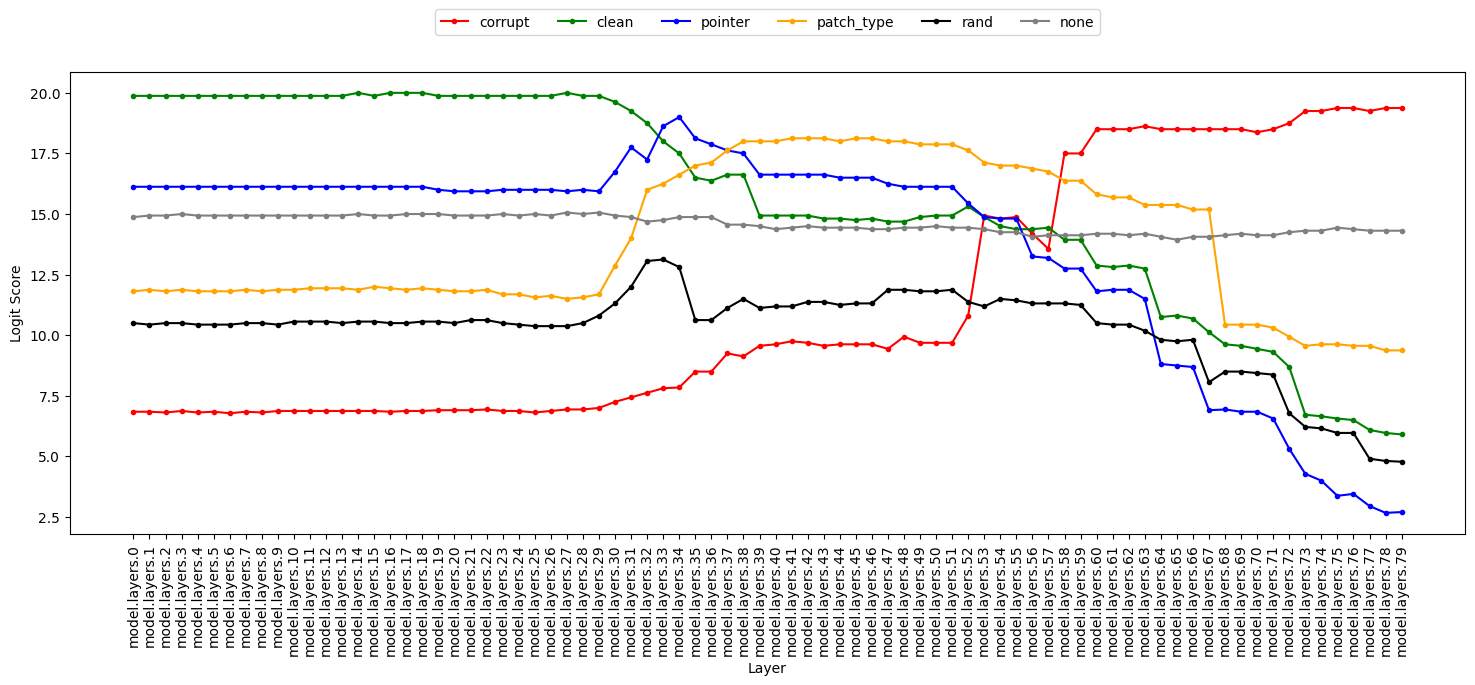

In [152]:
from matplotlib import pyplot as plt

METRIC = "logit"
scores = {obj_type: [] for obj_type in obj_track.keys()}
colors = {
    "corrupt": "red",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "orange",
    "rand": "black",
    "none": "gray",
}

for layer_name, result in patching_results.items():
    track = result["track"]
    for obj_type in obj_track.keys():
        tok_id = obj_track[obj_type]["id"]
        s = getattr(track[tok_id][1], METRIC)
        scores[obj_type].append(s)

xkeys = list(patching_results.keys())
plt.figure(figsize=(18, 6))

for key in scores:
    plt.plot(xkeys, scores[key], label=key, marker='o', markersize=3, color=colors[key])


plt.xticks(rotation=90)
plt.xlabel("Layer")
plt.ylabel("Logit Score")

plt.legend(ncols=len(scores), loc="upper center", bbox_to_anchor=(0.5, 1.15))

plt.show()

In [153]:
random.choice([0,1,2])

0

In [158]:
# **scale up**
from src.selection.data import (
    SelectionPatchingResult,
    ObjectwiseResult,
    LayerwiseResult,
)

# SELECT ONE TASK
prompt_template = """Which person from the following list has the profession in common with {}?
{}.
Ans:"""

##################################################################################################
N_RUNS = 3
N_DISTRACTORS = 5

locations = [(layer_name, -1) for layer_name in mt.layer_names]
logit_location = (mt.lm_head_name, -1)
layer_step = 1
##################################################################################################

run_idx = 0
patching_results = []

while run_idx < N_RUNS:
    run_idx += 1
    logger.info("#" * 100)
    logger.info(f"Run {run_idx}/{N_RUNS}")

    # select the patch sample
    patch_prof = random.choice(list(people_by_category.keys()))
    patch_obj_pos = random.choice(list(range(N_DISTRACTORS)))
    logger.info(f"patch_prof={patch_prof}, patch_obj_pos={patch_obj_pos}")

    # TODO(arnab): Check accuracy with the object as well.
    patch_sample = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=True,
        category=patch_prof,
        obj_idx=patch_obj_pos,
    )
    logger.info(f"patch_sample={str(patch_sample)}")
    logger.info(f"patch predictions={[str(pred) for pred in patch_sample.prediction]}")
    logger.info("-" * 50)

    # cache states
    patch_hs = get_hs(
        mt=mt,
        input=TokenizerOutput(data=patch_sample.metadata["tokenized"]),
        locations=locations,  # + [logit_location],
        return_dict=True,
    )

    # select the clean sample
    clean_prof = random.choice(list(set(people_by_category.keys()) - {patch_prof}))
    clean_obj_pos = random.choice(
        [idx for idx in range(N_DISTRACTORS) if idx != patch_obj_pos]
    )
    patch_type_pos = random.choice(
        list(set(list(range(0, N_DISTRACTORS))) - {clean_obj_pos, patch_obj_pos})
    )
    logger.info(f"clean_prof={clean_prof}, clean_obj_pos={clean_obj_pos}")

    logger.debug(
        f"patch_type_pos={patch_type_pos}, patch_obj_pos={patch_obj_pos}, clean_obj_pos={clean_obj_pos}"
    )

    clean_sample = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=False,
        category=clean_prof,
        obj_idx=clean_obj_pos,
        filter_by_lm_prediction=True,
        exclude_objs=[patch_sample.obj, patch_sample.metadata["alt_obj"][0]],
        exclude_distractor_categories=[patch_prof],
        insert_distractor=[(patch_sample.metadata["alt_obj"][0], patch_type_pos)],
    )
    logger.info(f"clean_sample={str(clean_sample)}")
    logger.info(f"clean predictions={[str(pred) for pred in clean_sample.prediction]}")
    logger.info("-" * 50)

    # do the interventions
    clean_tokenized = TokenizerOutput(
        data=clean_sample.metadata["tokenized"],
    )

    obj_corrupt = patch_sample.obj
    obj_clean = clean_sample.obj
    obj_pointer = clean_sample.options[patch_obj_pos]
    obj_patch_type = patch_sample.metadata["alt_obj"][0]
    obj_rand = random.choice(
        list(set(clean_sample.options) - {obj_clean, obj_pointer, obj_corrupt})
    )

    obj_track = {
        "corrupt": obj_corrupt,
        "clean": obj_clean,
        "pointer": obj_pointer,
        "patch_type": obj_patch_type,
        "rand": obj_rand,
        "none": " None",
    }

    for obj_type in obj_track:
        obj = obj_track[obj_type]
        obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
        obj_track[obj_type] = {
            "id": obj_id,
            "token": mt.tokenizer.decode(obj_id),
            "name": obj,
        }

    interested_tokens = [obj["id"] for obj in obj_track.values()]

    layerwise_patching_results = {}
    for layer_name in mt.layer_names[::1]:
        int_logit = get_hs(
            mt=mt,
            input=clean_tokenized,
            patches=[
                PatchSpec(
                    location=(layer_name, -1),
                    patch=patch_hs[(layer_name, -1)],
                    strategy="replace",
                )
            ],
            locations=[logit_location],
            return_dict=False,
        ).squeeze(0)

        pred, track = interpret_logits(
            logits=int_logit,
            tokenizer=mt,
            interested_tokens=interested_tokens,
        )
        objectwise_result = {}
        for obj_type in obj_track:
            obj_res = track[obj_track[obj_type]["id"]]
            objectwise_result[obj_type] = ObjectwiseResult(
                rank=obj_res[0], pred=obj_res[1]
            )
        layerwise_patching_results[layer_name] = LayerwiseResult(
            predictions=pred, objs=objectwise_result
        )
        print(f"{layer_name}: {[str(p) for p in pred]}, | track: {track}")

    patching_results.append(
        SelectionPatchingResult(
            patch_sample=patch_sample,
            clean_sample=clean_sample,
            results=layerwise_patching_results,
        )
    )

    print("#" * 100)

2025-07-16 15:58:34 __main__ INFO     ####################################################################################################
2025-07-16 15:58:34 __main__ INFO     Run 1/3
2025-07-16 15:58:34 __main__ INFO     patch_prof=actor, patch_obj_pos=2


2025-07-16 15:58:34 src.selection.data ERROR    Sample = Denzel Washington -> Natalie Portman (2): ['Larry Bird', 'Werner Heisenberg', 'Natalie Portman', 'Jeff Bezos', 'George Orwell', 'Peyton Manning']
Top prediction " None"[2290] (p=0.443, logit=18.625) does not match the object Natalie Portman[64120, " Natalie"].
Retrying ...

2025-07-16 15:58:35 __main__ INFO     patch_sample=Robert De Niro -> Scarlett Johansson (2): ['Taylor Swift', 'Louis C.K.', 'Scarlett Johansson', 'Richard Feynman', 'Wolfgang Puck', 'Walter Payton']
2025-07-16 15:58:35 __main__ INFO     patch predictions=['" Scarlett"[96572] (p=0.785, logit=20.250)', '" Louis"[12140] (p=0.064, logit=17.750)', '" ""[330] (p=0.064, logit=17.750)', '" The"[578] (p=0.018, logit=16.500)', '" None"[2290] (p=0.013, logit=16.125)']
2025-07-16 15:58:35 __main__ INFO     --------------------------------------------------
2025-07-16 15:58:35 __main__ INFO     clean_prof=physicist, clean_obj_pos=3
2025-07-16 15:58:35 __main__ DEBUG    pat

In [163]:
patching_results[1].results[mt.layer_name_format.format(5)].objs

{'corrupt': ObjectwiseResult(rank=3763, pred=PredictedToken(token=' Natalie', prob=3.241002559661865e-07, logit=4.0625, token_id=64120, metadata=None)),
 'clean': ObjectwiseResult(rank=1, pred=PredictedToken(token=' George', prob=0.46875, logit=18.25, token_id=10058, metadata=None)),
 'pointer': ObjectwiseResult(rank=17, pred=PredictedToken(token=' Max', prob=0.0016937255859375, logit=12.625, token_id=7639, metadata=None)),
 'patch_type': ObjectwiseResult(rank=8, pred=PredictedToken(token=' Brad', prob=0.008056640625, logit=14.1875, token_id=17478, metadata=None)),
 'rand': ObjectwiseResult(rank=18, pred=PredictedToken(token=' Mas', prob=0.0015869140625, logit=12.5625, token_id=20459, metadata=None)),
 'none': ObjectwiseResult(rank=12, pred=PredictedToken(token=' ', prob=0.004608154296875, logit=13.625, token_id=220, metadata=None))}

2025-07-16 16:11:37 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-16 16:11:37 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-16 16:11:37 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-16 16:11:37 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-16 16:11:37 matplotlib.category INFO

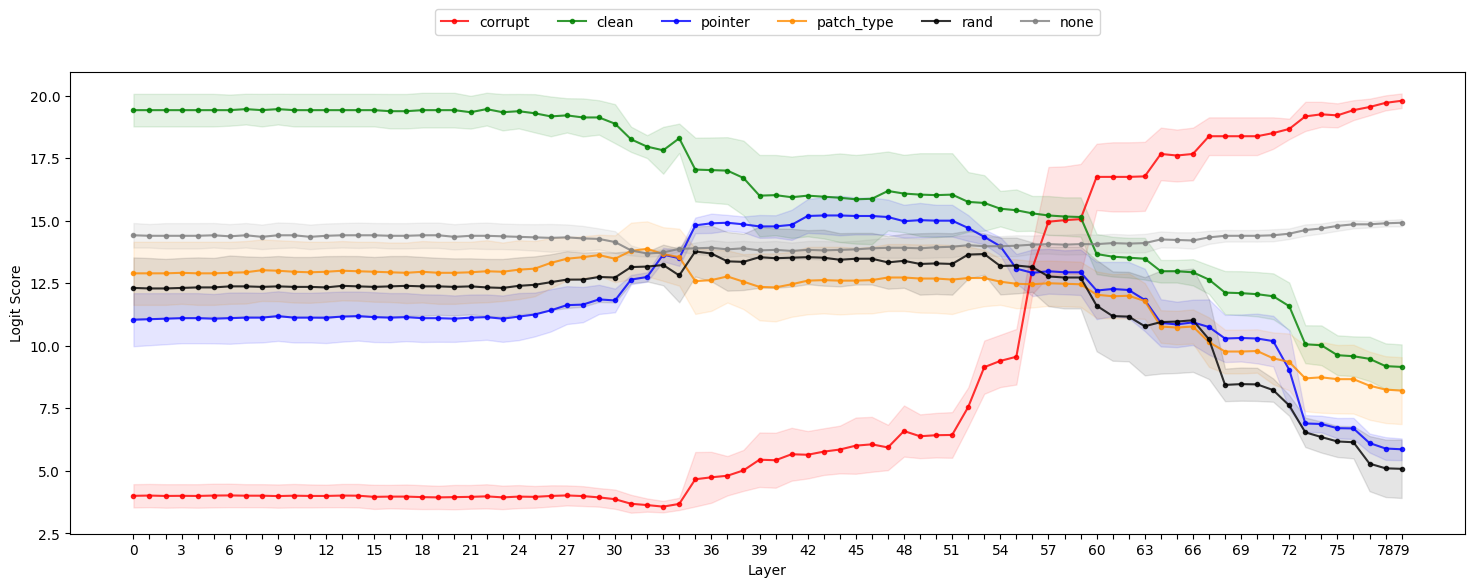

In [176]:
##############################################
METRIC = "logit"
colors = {
    "corrupt": "red",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "darkorange",
    "rand": "black",
    "none": "gray",
}
##############################################

all_scores = {obj_type: [] for obj_type in colors.keys()}
x_keys = list(patching_results[0].results.keys())
x_keys = [key.split(".")[-1] for key in x_keys]

def get_tick_labels(ticks, step=5):
    return [
        tick if (i % step == 0 or i == len(ticks) - 1) else ""
        for i, tick in enumerate(ticks)
    ]

for run in patching_results:
    run_score = {obj_type: [] for obj_type in all_scores.keys()}
    for layer_name, result in run.results.items():
        track = result.objs
        for obj_type in run_score.keys():
            run_score[obj_type].append(
                getattr(track[obj_type].pred, METRIC)
            )
    for obj_type in all_scores.keys():
        all_scores[obj_type].append(run_score[obj_type])

for obj_type in all_scores.keys():
    all_scores[obj_type] = torch.tensor(all_scores[obj_type])

plt.figure(figsize=(18, 6))
for key in all_scores:
    plt.plot(
        x_keys,
        all_scores[key].mean(dim=0).numpy(),
        label=key,
        marker="o",
        markersize=3,
        color=colors[key],
        alpha=0.8,
    )
    std_err = all_scores[key].std(dim=0).numpy() / (N_RUNS ** 0.5)
    plt.fill_between(
        x_keys,
        all_scores[key].mean(dim=0).numpy() - std_err,
        all_scores[key].mean(dim=0).numpy() + std_err,
        alpha=0.1,
        color=colors[key],
    )

plt.xticks(x_keys, labels=get_tick_labels(x_keys, step=3), rotation=0)
plt.xlabel("Layer")
plt.ylabel(f"{METRIC.capitalize()} Score")

plt.legend(ncols=len(all_scores), loc="upper center", bbox_to_anchor=(0.5, 1.15))

plt.show()

In [ ]:
# **scale up**

# SELECT ONE TASK
prompt_template = """Which person from the following list has the profession in common with {}?
{}.
Ans:"""

##################################################################################################
N_RUNS = 10
N_DISTRACTORS = 5

locations = [(layer_name, -1) for layer_name in mt.layer_names]
logit_location = (mt.lm_head_name, -1)
layer_step=1
##################################################################################################

run_idx = 0
results = []
while run_idx < N_RUNS:

    # patch run
    patch_prof = random.choice(list(people_by_prof_set.keys()))
    patch_obj_pos = random.randint(0, N_DISTRACTORS)
    print(f"{run_idx=}, {patch_prof=}, {patch_obj_pos=}")

    patch_subj = random.choice(people_by_prof_set[patch_prof].values)
    patch_obj = random.choice(
        (people_by_prof_set[patch_prof] - KeyedSet([patch_subj])).values
    )
    patch_subj_distractor = random.choice(
        (people_by_prof_set[patch_prof] - KeyedSet([patch_obj, patch_subj])).values
    )
    print(f"{patch_subj=}, {patch_obj=}, {patch_obj_pos=}")
    print(f"{patch_subj_distractor=}")

    patch_distractors = []
    other_profs = random.choices(
        list(set(people_by_prof.keys()) - {patch_prof}), k=N_DISTRACTORS
    )
    for prof in other_profs:
        patch_distractors.append(random.choice(people_by_prof_set[prof].values))

    obj_corrupt = get_first_token_id(patch_obj)
    obj_patch_subj = get_first_token_id(patch_subj_distractor)
    print(f'{obj_corrupt=} >> "{mt.tokenizer.decode(obj_corrupt)}", {patch_obj=}')
    print(
        f'{obj_patch_subj=} >> "{mt.tokenizer.decode(obj_patch_subj)}", {patch_subj_distractor=}'
    )

    patch_list = (
        patch_distractors[:patch_obj_pos]
        + [patch_obj]
        + patch_distractors[patch_obj_pos:]
    )
    print(f"{patch_list=}")

    patch_prompt = prompt_template.format(patch_subj, ", ".join(patch_list))
    print(f'"{patch_prompt}"')

    patch_hs = get_hs(
        mt=mt,
        input=patch_prompt,
        locations=locations + [logit_location],
        return_dict=True,
    )

    logit = patch_hs[logit_location]
    patch_pred = interpret_logits(logits=logit, tokenizer=mt)
    print(f"Patch prediction: {[str(p) for p in patch_pred]}")
    if patch_pred[0].token_id != obj_corrupt:
        print(f"Patch prediction failed: {patch_pred[0].token_id} != {obj_corrupt}")
        continue

    patch_information = {
        "patch_prof": patch_prof,
        "patch_subj": patch_subj,
        "patch_obj": patch_obj,
        "patch_obj_pos": patch_obj_pos,
        "patch_subj_distractor": patch_subj_distractor,
        "patch_list": patch_list,
        "patch_prompt": patch_prompt,
        "patch_pred": patch_pred,
    }
    

    print(f"\n{'-'*50}\n")


    # clean_run
    clean_prof = random.choice(list(set(people_by_prof_set.keys()) - {patch_prof}))
    clean_obj_pos = random.choice([idx for idx in range(N_DISTRACTORS) if idx != patch_obj_pos])
    print(f"{run_idx=}, {clean_prof=}, {clean_obj_pos=}")
    clean_subj = random.choice(people_by_prof_set[clean_prof].values)
    clean_obj = random.choice(
        (people_by_prof_set[clean_prof] - KeyedSet([clean_subj])).values
    )
    print(f"{clean_subj=}, {clean_obj=}, {clean_obj_pos=}")

    clean_distractors = []
    other_profs = random.choices(
        list(set(people_by_prof.keys()) - {clean_prof, patch_prof}),
        k=N_DISTRACTORS - 1,
    )
    for prof in other_profs:
        clean_distractors.append(
            random.choice((people_by_prof_set[prof] - KeyedSet(patch_distractors)).values)
        )
    clean_distractors += [patch_subj_distractor]
    random.shuffle(clean_distractors)

    clean_list = (
        clean_distractors[:clean_obj_pos]
        + [clean_obj]
        + clean_distractors[clean_obj_pos:]
    )

    obj_pointer = clean_list[patch_obj_pos]
    # make sure that obj_pointer and patch_obj are different
    while obj_pointer == patch_obj:
        other_idx = random.choice(
            set(list(range(len(clean_list))) - {patch_obj_pos, clean_obj_pos})
        )
        clean_list[patch_obj_pos], clean_list[other_idx] = (
            clean_list[other_idx],
            clean_list[patch_obj_pos],
        )
    
    obj_pointer = get_first_token_id(obj_pointer)
    print(f'{obj_pointer=} >> "{mt.tokenizer.decode(obj_pointer)}"')

    clean_prompt = prompt_template.format(clean_subj, ", ".join(clean_list))
    print(clean_prompt)

    obj_clean = get_first_token_id(clean_obj)
    print(f'{obj_clean=} >> "{mt.tokenizer.decode(obj_clean)}"')
    obj_rand = random.choice(
        list(
            set(clean_distractors)
            - {clean_obj, patch_subj_distractor, clean_list[patch_obj_pos]}
        )
    )
    obj_rand = get_first_token_id(obj_rand)
    print(f'{obj_rand=} >> "{mt.tokenizer.decode(obj_rand)}"')

    clean_hs = get_hs(
        mt=mt,
        input=clean_prompt,
        locations=locations + [logit_location],
        return_dict=True,
    )
    logit = clean_hs[logit_location]
    clean_pred = interpret_logits(logits=logit, tokenizer=mt)
    print(f"Clean prediction: {[str(p) for p in clean_pred]}")

    if clean_pred[0].token_id != obj_clean:
        print(f"Clean prediction failed: {clean_pred[0].token_id} != {obj_clean}")
        continue

    print("-" * 50)

    clean_information = {
        "clean_prof": clean_prof,
        "clean_subj": clean_subj,
        "clean_obj": clean_obj,
        "clean_obj_pos": clean_obj_pos,
        "clean_distractors": clean_distractors,
        "clean_list": clean_list,
        "clean_prompt": clean_prompt,
        "clean_pred": clean_pred,
    }

    track_objects = {
        "obj_corrupt": obj_corrupt,
        "obj_patch_subj": obj_patch_subj,
        "obj_pointer": obj_pointer,
        "obj_clean": obj_clean,
        "obj_rand": obj_rand,
    }

    print(f"\n{'-'*50}\n")

    # interventions
    patching_results = {}
    for layer_name in mt.layer_names[::layer_step]:
        int_logit = get_hs(
            mt=mt,
            input=clean_prompt,
            patches=[
                PatchSpec(
                    location=(layer_name, -1),
                    patch=patch_hs[(layer_name, -1)],
                    strategy="replace",
                )
            ],
            locations=[logit_location],
            return_dict=False,
        ).squeeze(0)

        pred, track = interpret_logits(
            logits=int_logit,
            tokenizer=mt,
            interested_tokens=[obj_clean, obj_pointer, obj_corrupt, obj_patch_subj, obj_rand],
        )
        patching_results[layer_name] = {
            "pred": pred,
            "track": track,
        }
        print(f'{layer_name}: {[str(p) for p in pred]}, | track: {track}')

    results.append({
        "run_idx": run_idx,
        "patching_results": patching_results,
        "patch_information": patch_information,
        "clean_information": clean_information,
        "track_objects": track_objects,
    })
    run_idx += 1

    print("#" * 50)

run_idx=0, patch_prof='basketball player', patch_obj_pos=0
patch_subj='LeBron James', patch_obj='Kobe Bryant', patch_obj_pos=0
patch_subj_distractor='Kareem Abdul-Jabbar'
obj_corrupt=70411 >> " Kobe", patch_obj='Kobe Bryant'
obj_patch_subj=96331 >> " Kare", patch_subj_distractor='Kareem Abdul-Jabbar'
patch_list=['Kobe Bryant', 'Marco Pierre White', 'Jane Austen', 'Quentin Tarantino', 'Richard Branson', 'Angelina Jolie']
"Which person from the following list has the profession in common with LeBron James?
Kobe Bryant, Marco Pierre White, Jane Austen, Quentin Tarantino, Richard Branson, Angelina Jolie.
Ans:"
Patch prediction: ['" Kobe"[70411] (p=0.840, logit=19.750)', '" The"[578] (p=0.032, logit=16.500)', '" LeBron"[58335] (p=0.022, logit=16.125)', '" None"[2290] (p=0.022, logit=16.125)', '"K"[42] (p=0.008, logit=15.125)']

--------------------------------------------------

run_idx=0, clean_prof='soccer player', clean_obj_pos=1
clean_subj='Franz Beckenbauer', clean_obj='Lionel Messi', 

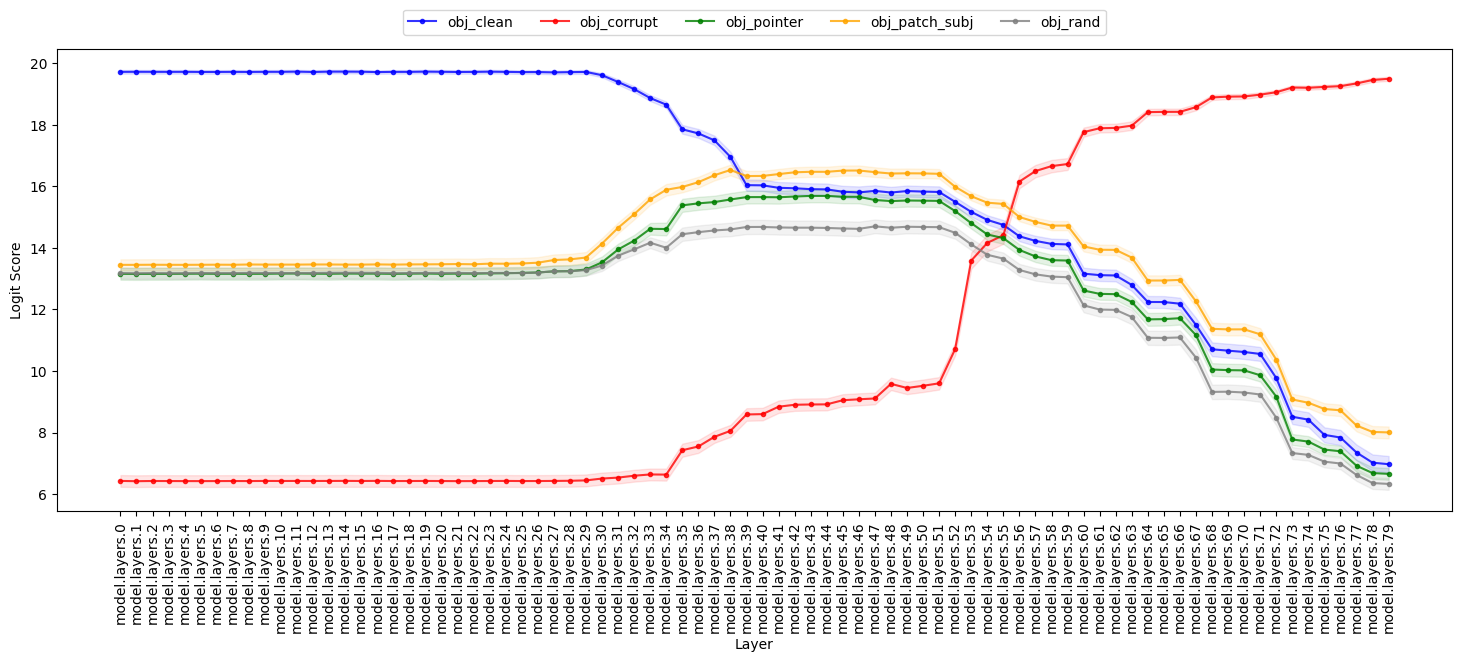

In [29]:
METRIC = "logit"

scores = {
    "obj_clean": [],
    "obj_corrupt": [],
    "obj_pointer": [],
    "obj_patch_subj": [],
    "obj_rand": [],
}

colors = {
    "obj_clean": "blue",
    "obj_pointer": "green",
    "obj_corrupt": "red",
    "obj_patch_subj": "orange",
    "obj_rand": "gray",
}

for run in results:
    obj = run["track_objects"]
    cur_scores = {k: [] for k in scores.keys()}
    for layer_name, result in run["patching_results"].items():
        for obj_type, token_id in run["track_objects"].items():
            # print(obj_type, token_id)
            cur_scores[obj_type].append(getattr(result["track"][token_id][1], METRIC))
    
    for key in cur_scores:
        scores[key].append(cur_scores[key])

for key in scores:
    scores[key] = torch.tensor(scores[key])

xkeys = list(patching_results.keys())
plt.figure(figsize=(18, 6))

for key in scores:
    plt.plot(
        xkeys,
        scores[key].mean(dim=0).numpy(),
        label=key,
        marker="o",
        markersize=3,
        color=colors[key],
        alpha=0.8,
    )

    stderr = scores[key].std(dim=0) / (N_RUNS ** 0.5)
    plt.fill_between(
        xkeys,
        scores[key].mean(dim=0).numpy() - stderr.numpy(),
        scores[key].mean(dim=0).numpy() + stderr.numpy(),
        alpha=0.1,
        color=colors[key],
    )

# for key in scores:
#     print(f"{key}: {scores[key].mean(dim=0).numpy()}")

plt.xticks(rotation=90)
plt.xlabel("Layer")
plt.ylabel(f"{METRIC.capitalize()} Score")

plt.legend(ncols=len(scores), loc="upper center", bbox_to_anchor=(0.5, 1.1))

plt.show()

In [20]:
len(results)

40